In [1]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np


# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Importing the dataset
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('data.csv', encoding=DATASET_ENCODING)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
df.dtypes

Sentence     object
Sentiment    object
dtype: object

In [5]:
df['Sentence'] = df['Sentence'].astype('string')

In [6]:
df['Sentiment'] = df['Sentiment'].astype('string')

In [7]:
df.dtypes

Sentence     string[python]
Sentiment    string[python]
dtype: object

In [8]:
df. shape

(5842, 2)

In [9]:
np.sum(df.isnull().any(axis=1))

0

In [10]:
df['Sentiment'].unique()

<StringArray>
['positive', 'negative', 'neutral']
Length: 3, dtype: string

In [11]:
df['Sentiment'].nunique()

3

In [12]:
df['Sentiment'] = df['Sentiment'].map({'positive': 2, 'negative': 0, 'neutral': 1})

<Axes: xlabel='Sentiment', ylabel='count'>

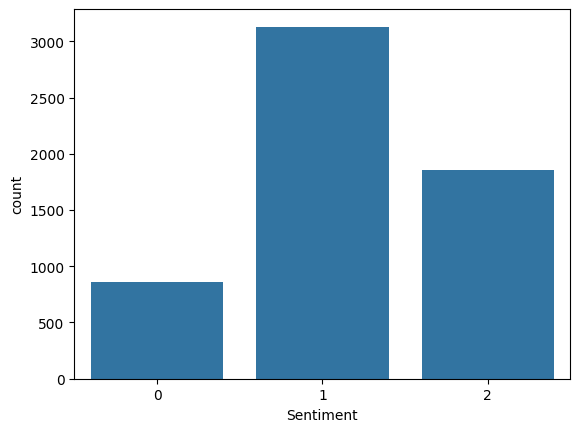

In [13]:
sns.countplot(x='Sentiment', data=df)

In [14]:
data=df[['Sentence','Sentiment']]

In [15]:
data_pos = data[data['Sentiment'] == 2]
data_neut = data[data['Sentiment'] == 1]
data_neg = data[data['Sentiment'] == 0]

In [16]:
size= data_neg.shape[0]

In [17]:
dataset_size= df.shape[0]-1

In [18]:
data_pos = data_pos.iloc[:int(size)]
data_neg = data_neg.iloc[:int(size)]
data_neut = data_neut.iloc[:int(size)]

In [19]:
dataset = pd.concat([data_pos[:], data_neg, data_neut])

<Axes: xlabel='Sentiment', ylabel='count'>

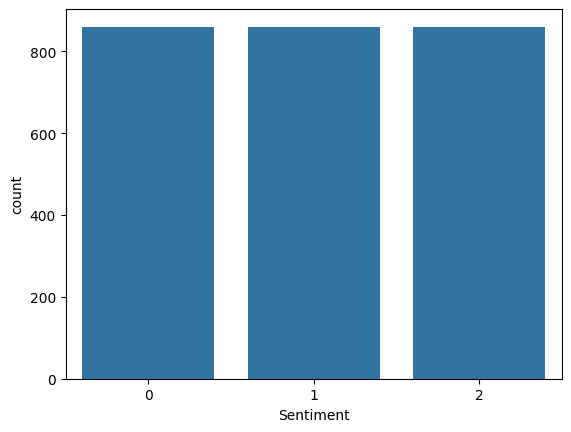

In [20]:
sns.countplot(x='Sentiment', data=dataset)

In [21]:
dataset['Sentence']=dataset['Sentence'].str.lower()
dataset['Sentence'].tail()

1612    efore has decided to establish a company for e...
1614    the passenger tunnel is expected to be put int...
1616    at the request of finnish media company alma m...
1617    as a result , it has started negotiations with...
1618    activities range from the development of natur...
Name: Sentence, dtype: string

In [22]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['Sentence'] = dataset['Sentence'].apply(lambda text: cleaning_stopwords(text))
dataset['Sentence'].head()

0     geosolutions technology leverage benefon 's gp...
2     last quarter 2010 , componenta 's net sales do...
5               $spy wouldn't surprised see green close
8     kone 's net sales rose 14 % year-on-year first...
10    circulation revenue increased 5 % finland 4 % ...
Name: Sentence, dtype: object

In [24]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['Sentence']= dataset['Sentence'].apply(lambda x: cleaning_punctuations(x))
dataset['Sentence'].tail()

1612    efore decided establish company eletric vehicl...
1614        passenger tunnel expected put operation 2009 
1616    request finnish media company alma media s new...
1617    result  started negotiations banks provisional...
1618    activities range development natural resources...
Name: Sentence, dtype: object

In [25]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_repeating_char(x))
dataset['Sentence'].tail()

1612    efore decided establish company eletric vehicl...
1614        passenger tunnel expected put operation 2009 
1616    request finnish media company alma media s new...
1617    result  started negotiations banks provisional...
1618    activities range development natural resources...
Name: Sentence, dtype: object

In [26]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_URLs(x))
dataset['Sentence'].tail()

1612    efore decided establish company eletric vehicl...
1614        passenger tunnel expected put operation 2009 
1616    request finnish media company alma media s new...
1617    result  started negotiations banks provisional...
1618    activities range development natural resources...
Name: Sentence, dtype: object

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_numbers(x))
dataset['Sentence'].tail()

1612    efore decided establish company eletric vehicl...
1614            passenger tunnel expected put operation  
1616    request finnish media company alma media s new...
1617    result  started negotiations banks provisional...
1618    activities range development natural resources...
Name: Sentence, dtype: object

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
dataset['Sentence'] = dataset['Sentence'].apply(tokenizer.tokenize)
dataset['Sentence'].head()

0     [geosolutions, technology, leverage, benefon, ...
2     [last, quarter, componenta, s, net, sales, dou...
5          [spy, wouldnt, surprised, see, green, close]
8     [kone, s, net, sales, rose, yearonyear, first,...
10    [circulation, revenue, increased, finland, swe...
Name: Sentence, dtype: object

In [29]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Sentence']= dataset['Sentence'].apply(lambda x: stemming_on_text(x))
dataset['Sentence'].head()

0     [geosolutions, technology, leverage, benefon, ...
2     [last, quarter, componenta, s, net, sales, dou...
5          [spy, wouldnt, surprised, see, green, close]
8     [kone, s, net, sales, rose, yearonyear, first,...
10    [circulation, revenue, increased, finland, swe...
Name: Sentence, dtype: object

In [30]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: lemmatizer_on_text(x))
dataset['Sentence'].head()

0     [geosolutions, technology, leverage, benefon, ...
2     [last, quarter, componenta, s, net, sales, dou...
5          [spy, wouldnt, surprised, see, green, close]
8     [kone, s, net, sales, rose, yearonyear, first,...
10    [circulation, revenue, increased, finland, swe...
Name: Sentence, dtype: object

In [31]:
data.dtypes

Sentence     string[python]
Sentiment             int64
dtype: object

In [32]:
X=data.Sentence
y=data.Sentiment

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [34]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=dataset_size)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5841


In [35]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [36]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 116295 stored elements and shape (5549, 5841)>

In [37]:
def model_Evaluate(model):

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Neutral', 'Positive']
    group_names = ['True Neg','False Neu','False Pos',
                   'False Neg','True Neu','False Pos',
                   'False Neg','False Neu','True Pos']

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(3, 3)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size':14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)
    plt.show()


              precision    recall  f1-score   support

           0       0.33      0.24      0.28        38
           1       0.76      0.83      0.80       151
           2       0.76      0.74      0.75       104

    accuracy                           0.72       293
   macro avg       0.62      0.60      0.61       293
weighted avg       0.71      0.72      0.71       293



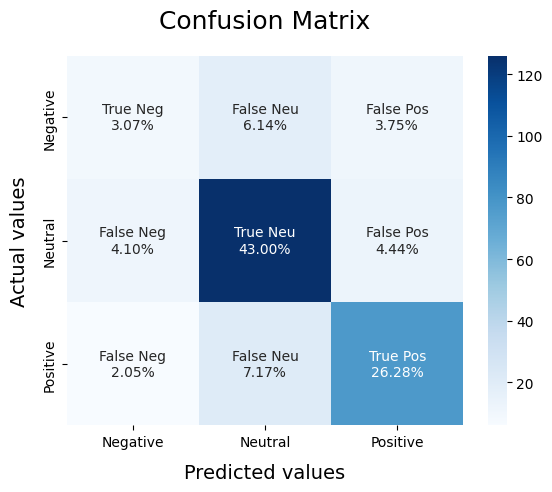

In [38]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.19      0.13      0.16        38
           1       0.71      0.84      0.77       151
           2       0.84      0.72      0.78       104

    accuracy                           0.71       293
   macro avg       0.58      0.56      0.57       293
weighted avg       0.69      0.71      0.69       293



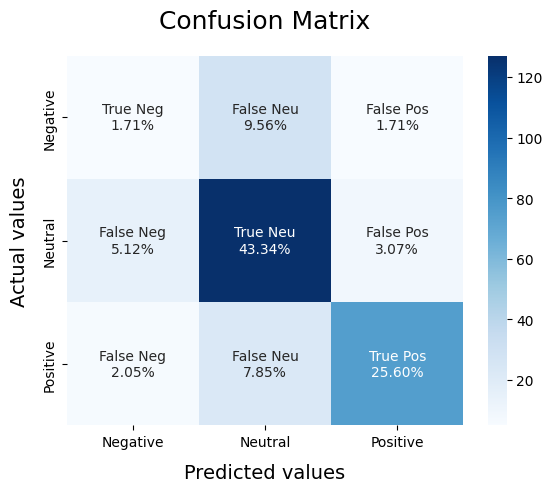

In [39]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.22      0.11      0.14        38
           1       0.70      0.88      0.78       151
           2       0.85      0.69      0.76       104

    accuracy                           0.71       293
   macro avg       0.59      0.56      0.56       293
weighted avg       0.69      0.71      0.69       293



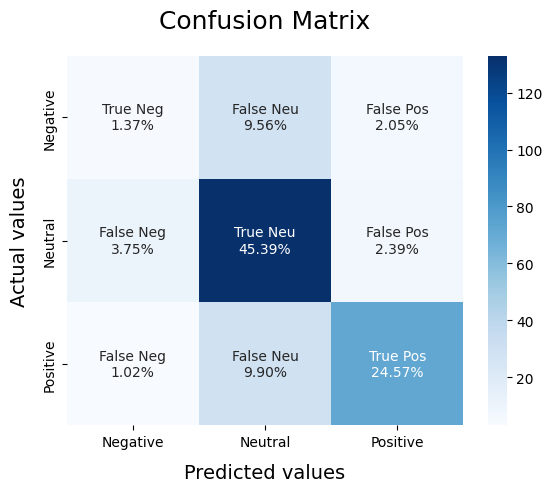

In [40]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.12      0.05      0.07        38
           1       0.68      0.87      0.76       151
           2       0.83      0.67      0.74       104

    accuracy                           0.69       293
   macro avg       0.55      0.53      0.53       293
weighted avg       0.66      0.69      0.67       293



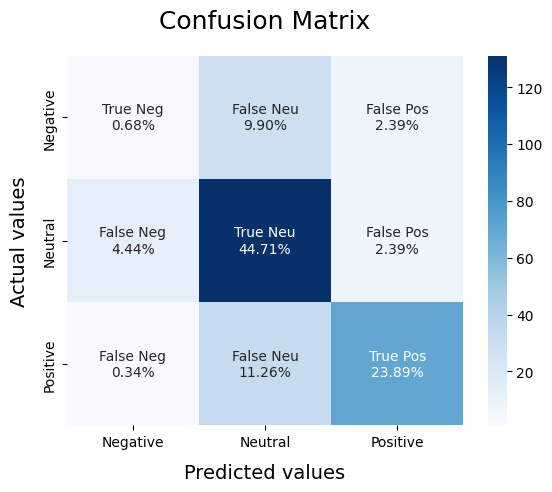

In [41]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgboost_model.fit(X_train, y_train)
model_Evaluate(xgboost_model)
y_pred = xgboost_model.predict(X_test)



In [43]:
import joblib

joblib.dump(vectoriser, "vectoriser.pkl")


['vectoriser.pkl']

In [ ]:
joblib.dump(xgboost_model, "xgb_model.pkl")

['xgb_model.pkl']